In [3]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.8 MB/s eta 0:00:00


scikit-fuzzy version: 0.5.0
Tip: 16.91
Brake: 16.67


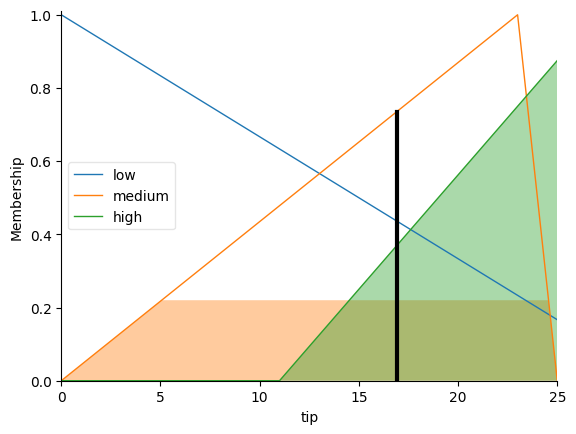

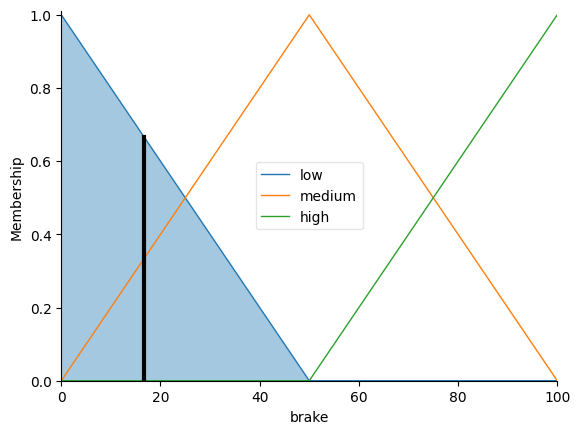

In [11]:
import skfuzzy
print(f"scikit-fuzzy version: {skfuzzy.__version__}")


import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Restaurant Tipping System
def restaurant_tipping():
    # Define input and output variables
    service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
    food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
    tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

    # Define membership functions
    service.automf(3)
    food.automf(3)
    tip['low'] = fuzz.trimf(tip.universe, [0, 0, 30])
    tip['medium'] = fuzz.trimf(tip.universe, [0, 23, 25])
    tip['high'] = fuzz.trimf(tip.universe, [11, 27, 27])

    # Define fuzzy rules
    rule1 = ctrl.Rule(service['poor'] | food['poor'], tip['low'])
    rule2 = ctrl.Rule(service['average'], tip['medium'])
    rule3 = ctrl.Rule(service['good'] | food['good'], tip['high'])

    # Create control system
    tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

    # Input values
    tipping.input['service'] = 8.9
    tipping.input['food'] = 10.11

    # Compute the result
    tipping.compute()

    # Print and visualize the result
    print(f"Tip: {tipping.output['tip']:.2f}")
    tip.view(sim=tipping)

# ABS Brake System
def abs_brake_system():
    # Define input and output variables
    speed = ctrl.Antecedent(np.arange(0, 101, 1), 'speed')
    slip = ctrl.Antecedent(np.arange(0, 11, 1), 'slip')
    brake = ctrl.Consequent(np.arange(0, 101, 1), 'brake')

    # Define membership functions
    speed.automf(5)
    slip.automf(5)
    brake['low'] = fuzz.trimf(brake.universe, [0, 0, 50])
    brake['medium'] = fuzz.trimf(brake.universe, [0, 50, 100])
    brake['high'] = fuzz.trimf(brake.universe, [50, 100, 100])

    # Define fuzzy rules
    rule1 = ctrl.Rule(speed['poor'] | slip['poor'], brake['high'])
    rule2 = ctrl.Rule(speed['average'], brake['medium'])
    rule3 = ctrl.Rule(speed['good'] | slip['good'], brake['low'])

    # Create control system
    braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    braking = ctrl.ControlSystemSimulation(braking_ctrl)

    # Input values
    braking.input['speed'] = 100
    braking.input['slip'] = 6

    # Compute the result
    braking.compute()

    # Print and visualize the result
    print(f"Brake: {braking.output['brake']:.2f}")
    brake.view(sim=braking)

# Run the systems
restaurant_tipping()
abs_brake_system()
plt.show()

In [6]:
!pip install scikit-fuzzy